In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [123]:
train = pd.read_csv("Model_Train_Data.csv" , delimiter=" *, *" ,engine='python')
print(train.shape)
train.head()


(1460, 76)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [4]:
'''
Make Assumptions
We can make assumptions about  predictors that might influence the fluctuation on the housing sale price:

Neighbourhood;
Year it was built;
Number of rooms;
Has a fireplace?
Has heating?
Has a pool?
Number of parking spots;
The lot size;
Proximity to schools, public transportations, malls, etc;
Type of dwelling;
Size of inside and outside areas.
'''

'\nMake Assumptions\nWe can make assumptions about  predictors that might influence the fluctuation on the housing sale price:\n\nNeighbourhood;\nYear it was built;\nNumber of rooms;\nHas a fireplace?\nHas heating?\nHas a pool?\nNumber of parking spots;\nThe lot size;\nProximity to schools, public transportations, malls, etc;\nType of dwelling;\nSize of inside and outside areas.\n'

# 1. Exploratory Data Analysis (EDA)

C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'House Sales Price Distribution')

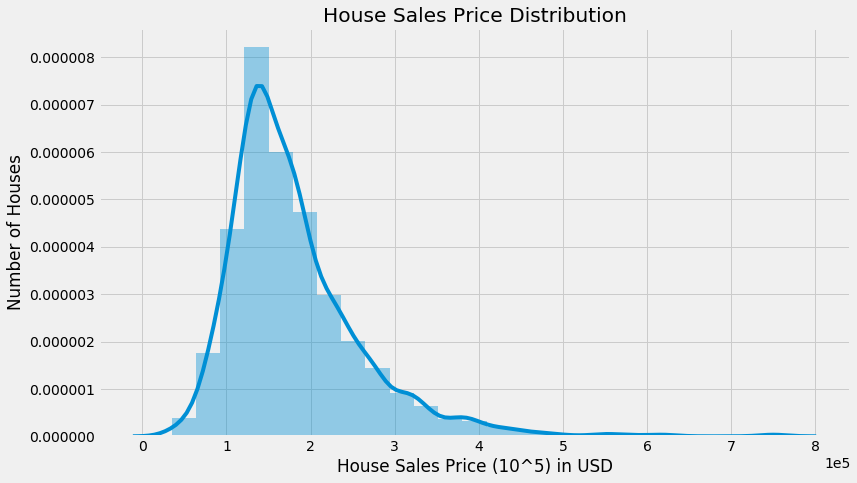

In [124]:
#Distribution of the target variable: SalesPrice
plt.style.use('fivethirtyeight')  #graph style
plt.figure(figsize=(12,7))
sns.distplot(train.SalePrice, bins = 25)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,1)) 
plt.xlabel("House Sales Price (10^5) in USD")
plt.ylabel("Number of Houses")
plt.title("House Sales Price Distribution")

In [125]:
print('Skew is:', train.SalePrice.skew())
print("Kurtosis: %f" % train.SalePrice.kurt())


Skew is: 1.8828757597682129
Kurtosis: 6.536282


Text(0.5, 1.0, 'House Sales Price Distribution')

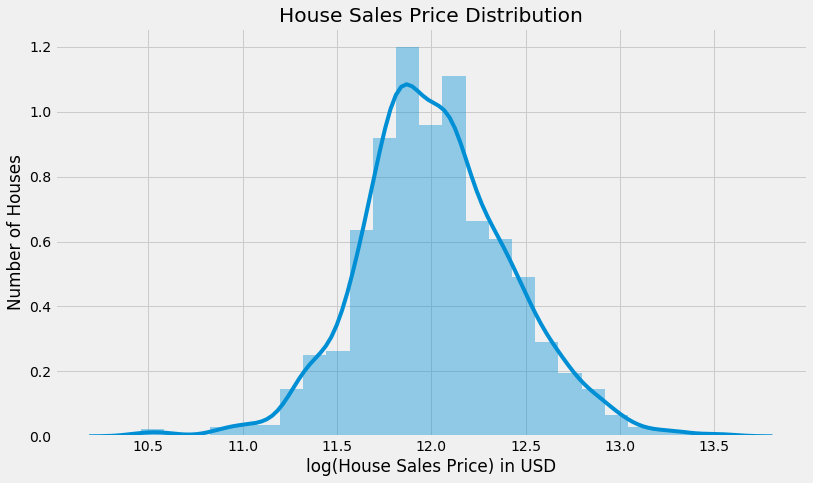

In [126]:
#Logarithimic distribution of the target variable : SalesPrice
#Appling log on SalePrice
plt.figure(figsize=(12,7))
sns.distplot(np.log(train.SalePrice), bins = 25) #ploting the graph to check ROC curve
plt.xlabel("log(House Sales Price) in USD")
plt.ylabel("Number of Houses")
plt.title("House Sales Price Distribution")
#plt.hist(np.log(train.SalePrice), bins = 25)

In [127]:
print("Skew is:", np.log(train.SalePrice).skew())
print("Kurtosis: %f" % np.log(train.SalePrice).kurt())


Skew is: 0.12133506220520406
Kurtosis: 0.809532


In [128]:
#Converting SalePrice to log value
train.SalePrice = np.log(train.SalePrice)


In [129]:
#Remvoving column ID
train.drop("Id",axis = 1, inplace = True)
train.head()
train.shape

(1460, 75)

# Numerical Predictors

In [13]:
#Numerical Predictors
#Let’s start by seeing which of our features are numeric.
numeric_features = train.select_dtypes(include=[np.number])
i=0
for value in  numeric_features:
    i=i+1
    print(value," ",i)
    

MSSubClass   1
LotFrontage   2
LotArea   3
OverallQual   4
OverallCond   5
YearBuilt   6
YearRemodAdd   7
MasVnrArea   8
BsmtFinSF1   9
BsmtFinSF2   10
BsmtUnfSF   11
TotalBsmtSF   12
X1stFlrSF   13
X2ndFlrSF   14
LowQualFinSF   15
GrLivArea   16
BsmtFullBath   17
BsmtHalfBath   18
FullBath   19
HalfBath   20
BedroomAbvGr   21
KitchenAbvGr   22
TotRmsAbvGrd   23
Fireplaces   24
GarageYrBlt   25
GarageCars   26
GarageArea   27
WoodDeckSF   28
OpenPorchSF   29
EnclosedPorch   30
X3SsnPorch   31
ScreenPorch   32
PoolArea   33
MiscVal   34
MoSold   35
YrSold   36
SalePrice   37


In [14]:
#let’s see the top 5 and lowest 5 features which correlate with our targe variable.
#numeric_features.drop("SalePrice", axis = 1, inplace = True)
corr = numeric_features.corr() #Store Correlation values 
print(corr['SalePrice'].sort_values(ascending=False)[:10], '\n') #Check top 10 +ve correlations
print(corr['SalePrice'].sort_values(ascending=False)[-10:])#Check top 10 +ve correlations

SalePrice       1.000000
OverallQual     0.817184
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
X1stFlrSF       0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
Name: SalePrice, dtype: float64 

X3SsnPorch       0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64


In [ ]:
'''The first five values represent the top 5 features which highly correlate with the SalePrice, 
hence, if one of this features tends to increase so does the sale price of the house.
On the other hand, the lowest five features which negatively correlate to our target will have
a negative impact on the sales value if their corresponding value increase.'''

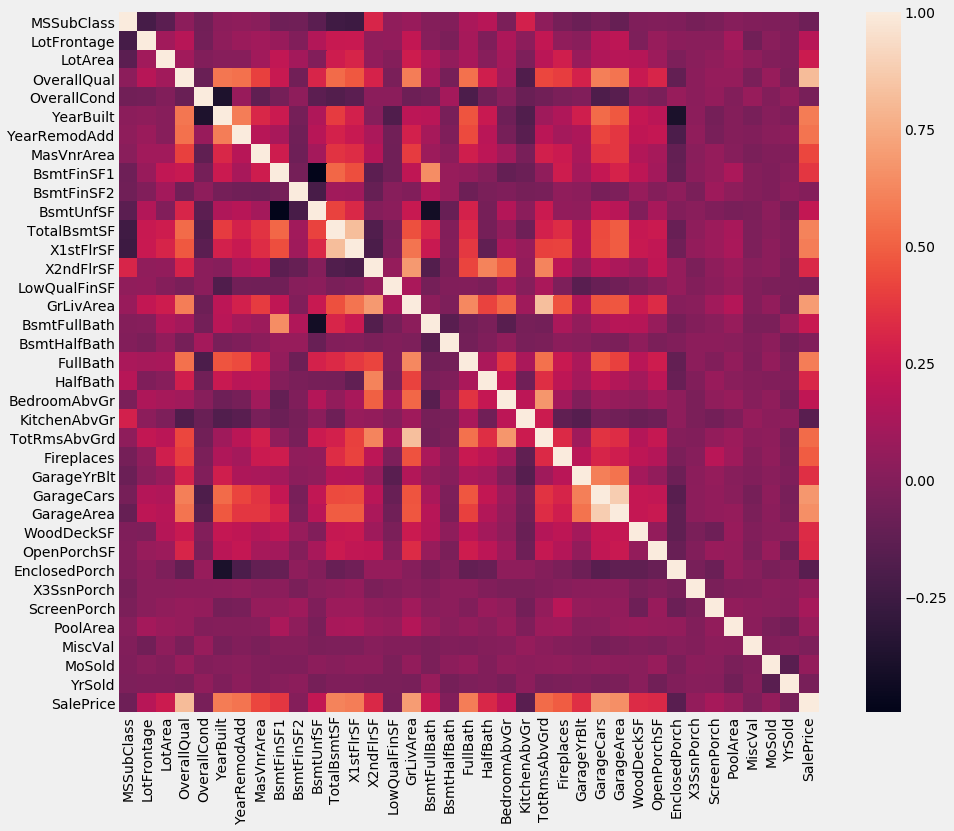

In [15]:
#correlation matrix
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, square=True)

In [43]:
'''If we observe closely the heatmap it stands out the strong correlation relationship of value between 
GarageCars and GarageArea as well as TotalBsmtSF and 1stFlrSF. 
These correlations are so strong that it can indicate a situation of multicollinearity. 
If we think about these variables, we can conclude that they give almost the same information so multicollinearity 
really occurs. Furthermore, there are some other strong negative correlation,
for example, BsmtFullBath and BsmtUnfSf ,BsmtUnfSf and BsmtFinSF2 , among others. Moreover, 
we can also see on the bottom or the right, the correlation between log_SapePrice and the predictors.'''

'If we observe closely the heatmap it stands out the strong correlation relationship of value between \nGarageCars and GarageArea as well as TotalBsmtSF and 1stFlrSF. \nThese correlations are so strong that it can indicate a situation of multicollinearity. \nIf we think about these variables, we can conclude that they give almost the same information so multicollinearity \nreally occurs. Furthermore, there are some other strong negative correlation,\nfor example, BsmtFullBath and BsmtUnfSf ,BsmtUnfSf and BsmtFinSF2 , among others. Moreover, \nwe can also see on the bottom or the right, the correlation between log_SapePrice and the predictors.'

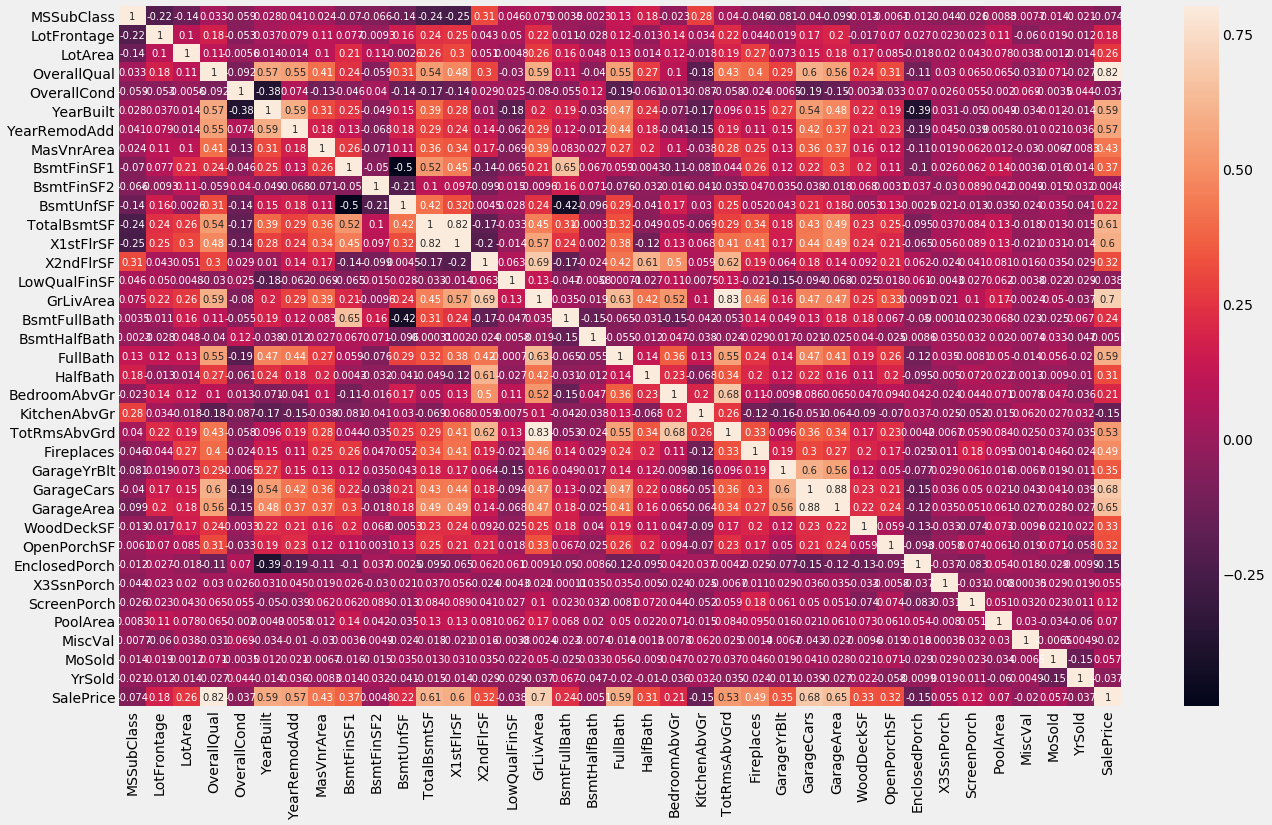

In [16]:
#correlation matrix
f, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 10}, annot=True);

In [ ]:
'''
From our first analysis we can already take out some conclusions:
1)OverallQual, GrLivArea and TotalBsmtSF are strongly correlated with SalePrice ;
2)GarageCars and GarageArea are also some of the most strongly correlated variables.
However, the number of cars that fit into the garage is a consequence of the garage area. 
Hence the system will make no difference between the two predictors and makes no sense keep both in our analysis.
Let’s keep GarageCars since its correlation with SalePriceis higher
3)TotalBsmtSF and 1stFloor also have very high correlation. We can keep TotalBsmtSF 
4)TotRmsAbvGrd and GrLivArea have a correlation of 0.83;
5)YearBuilt is highly correlated with SalePrice . Maybe we should do a time-series analysis.
'''

In [18]:
s = corr.unstack()
s[(abs(s)>0.6) & (abs(s) < 1)]

OverallQual   GarageCars      0.600671
              SalePrice       0.817184
BsmtFinSF1    BsmtFullBath    0.649212
TotalBsmtSF   X1stFlrSF       0.819530
              SalePrice       0.612134
X1stFlrSF     TotalBsmtSF     0.819530
X2ndFlrSF     GrLivArea       0.687501
              HalfBath        0.609707
              TotRmsAbvGrd    0.616423
GrLivArea     X2ndFlrSF       0.687501
              FullBath        0.630012
              TotRmsAbvGrd    0.825489
              SalePrice       0.700927
BsmtFullBath  BsmtFinSF1      0.649212
FullBath      GrLivArea       0.630012
HalfBath      X2ndFlrSF       0.609707
BedroomAbvGr  TotRmsAbvGrd    0.676620
TotRmsAbvGrd  X2ndFlrSF       0.616423
              GrLivArea       0.825489
              BedroomAbvGr    0.676620
GarageCars    OverallQual     0.600671
              GarageArea      0.882475
              SalePrice       0.680625
GarageArea    GarageCars      0.882475
              SalePrice       0.650888
SalePrice     OverallQual

# Distribution of the variable
Now it is time to look at the variables that contain some insight on the assumptions previously made

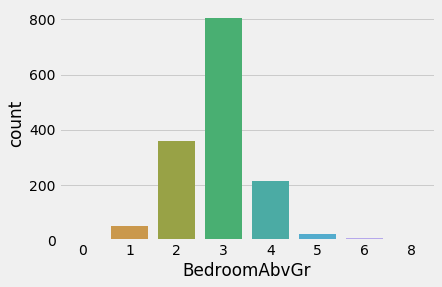

In [19]:
#Distribution of the variable BedroomAbvGr
sns.countplot(train.BedroomAbvGr)

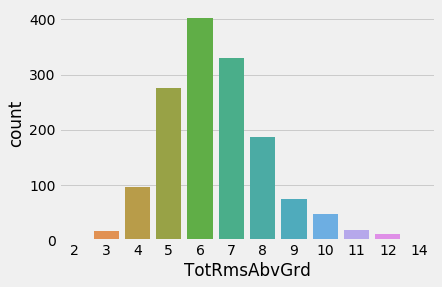

In [20]:
#Distribution of the variable TotRmsAbvGrd
sns.countplot(train.TotRmsAbvGrd)

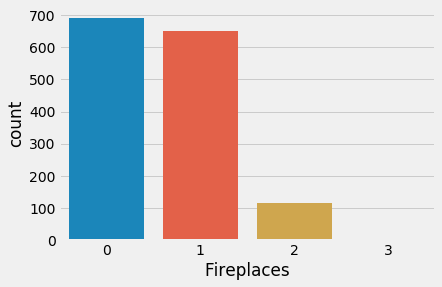

In [21]:
# Distribution of the variable Fireplaces
sns.countplot(train.Fireplaces)

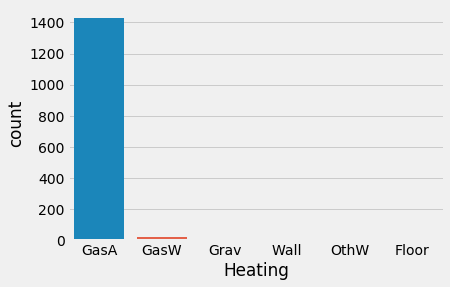

In [22]:
#Distribution of the variable Heating
sns.countplot(train.Heating)


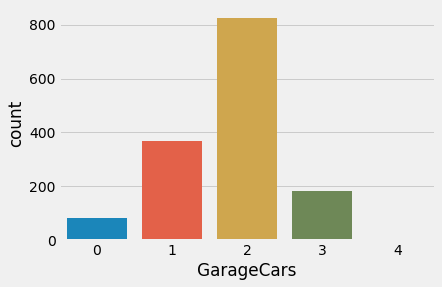

In [23]:
#Distribution of the variable GarageCars
sns.countplot(train.GarageCars)

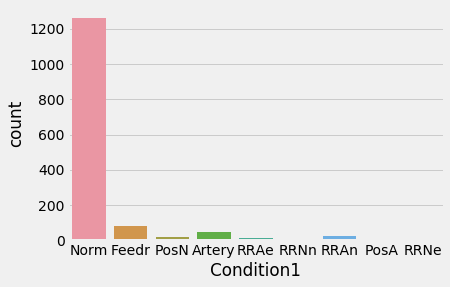

In [24]:
#Distribution of the variable Condition1
sns.countplot(train.Condition1)

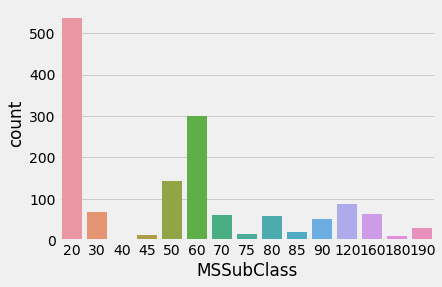

In [25]:
#Distribution of the variable MSSubClass
sns.countplot(train.MSSubClass)

Bivariate Analysis


Firstly we individually analysed some of the existent features, now it is time to understand the relationship between our target variable and predictors as well as the relationship among predictors.

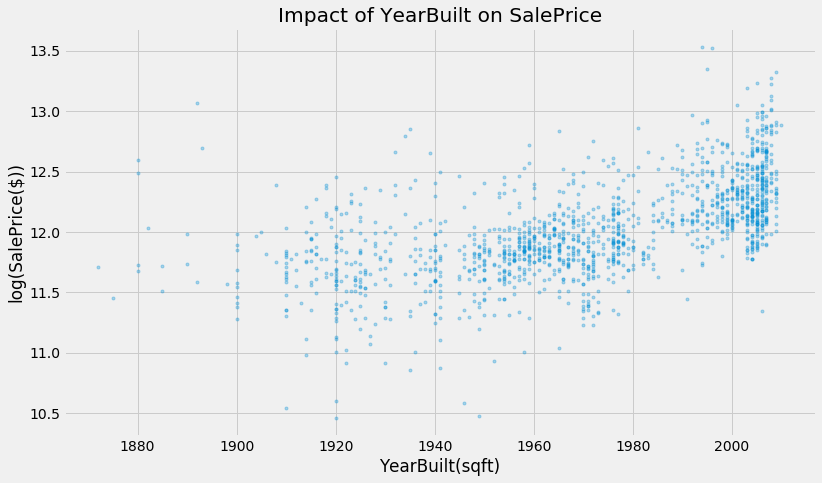

In [26]:
#YearBuilt vs SalePrice
plt.figure(figsize=(12,7))
plt.xlabel("YearBuilt(sqft)")
plt.ylabel("log(SalePrice($))")
plt.title("Impact of YearBuilt on SalePrice")
plt.plot(train.YearBuilt, train.SalePrice ,'.', alpha = 0.3)

In [27]:
#TotRmsAbvGrdvs SalePrice
#The total number of bedrooms has a positive impact on the final sale price, 
#with prices increasing from houses with only two bedrooms to eleven. Nevertheless, 
#houses with more than eleven bedrooms tend to see its price decrease regardeless of the higher number.
train.TotRmsAbvGrd.unique()

array([ 8,  6,  7,  9,  5, 11,  4, 10, 12,  3,  2, 14], dtype=int64)

In [28]:
TotRmsAbvGrd_pivot = train.pivot_table(index='TotRmsAbvGrd', values='SalePrice', aggfunc=np.median)
TotRmsAbvGrd_pivot

,SalePrice
TotRmsAbvGrd,
2,10.578980
3,11.512925
4,11.699405
5,11.777211
6,11.951180
7,12.123234
8,12.206073
9,12.437184
10,12.560244


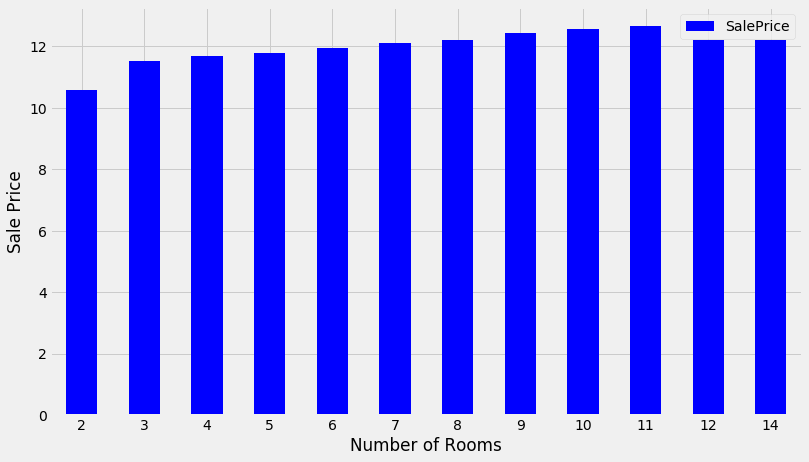

In [29]:
TotRmsAbvGrd_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel('Number of Rooms')
plt.ylabel('Sale Price')
plt.xticks(rotation=0)
plt.show()

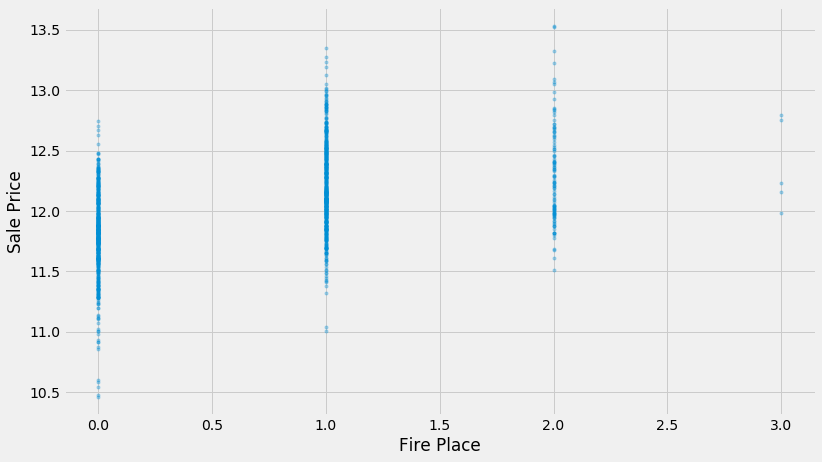

In [30]:
#Fireplace vs SalePrice
plt.figure(figsize=(12,7))
plt.xlabel('Fire Place')
plt.ylabel('Sale Price')
plt.plot(train.Fireplaces , train.SalePrice,'.' , alpha = 0.3)

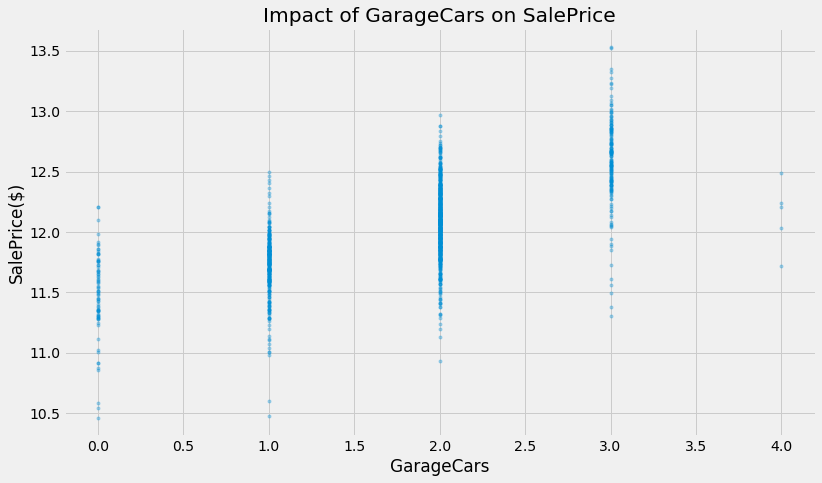

In [31]:
#GarageCars vs SalePrice
'''we saw that parking spots are important form buyers in Ames.
Here we can observe that most houses have at least one parking place and that the higher that number the more expensive
the house becomes. Similar to the previous example, 
houses with no parking spot were sold at the same price as houses with at least one, 
showing that this in an important predictor as the correlation showed,but not by itself.'''


plt.figure(figsize=(12,7))
plt.xlabel("GarageCars")
plt.ylabel("SalePrice($)")
plt.title("Impact of GarageCars on SalePrice")
plt.plot(train.GarageCars, train.SalePrice,'.', alpha = 0.3)

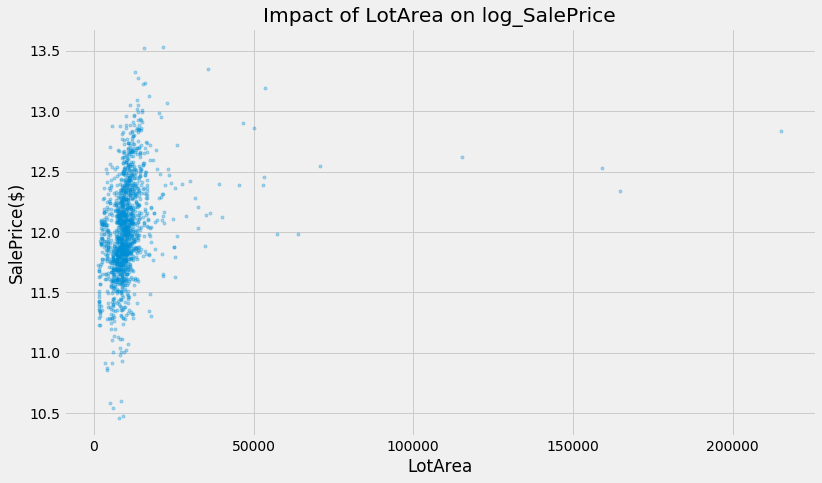

In [32]:
#LotArea vs SalePrice
#As the LotArea increases affects final price of the House. However, there are some outliers.
plt.figure(figsize=(12,7))
plt.xlabel("LotArea")
plt.ylabel("SalePrice($)")
plt.title("Impact of LotArea on log_SalePrice")
plt.plot(train.LotArea, train.SalePrice,'.', alpha = 0.3)

In [33]:
#OverallQual vs SalePrice
#We see that OverallQual has more correlation with SalePrice
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [34]:
quality_pivot = train.pivot_table(index='OverallQual' , values='SalePrice' , aggfunc=np.median)
quality_pivot

,SalePrice
OverallQual,
1,10.798804
2,11.002100
3,11.364900
4,11.589887
5,11.798104
6,11.982929
7,12.206777
8,12.505250
9,12.751300


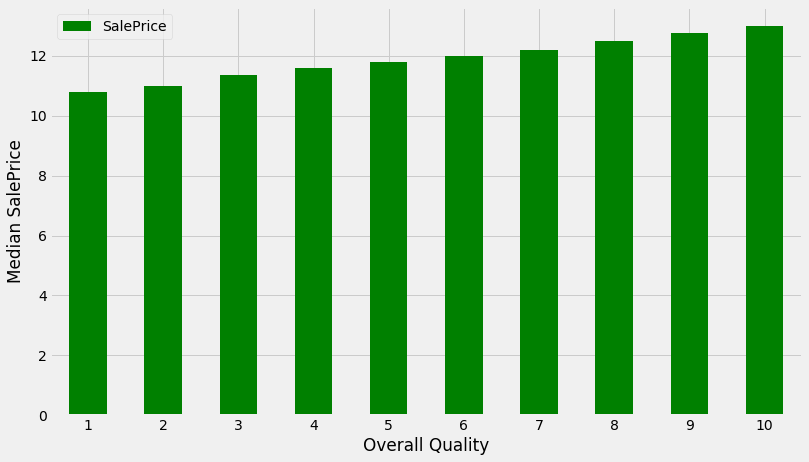

In [35]:
quality_pivot.plot(kind='bar', color='green',figsize=(12,7))
plt.xlabel('Overall Quality')
plt.ylabel('Median SalePrice')
plt.xticks(rotation=0)
plt.show()

In [36]:
#As expected, the most expensive houses will have the highest OverallQual. 

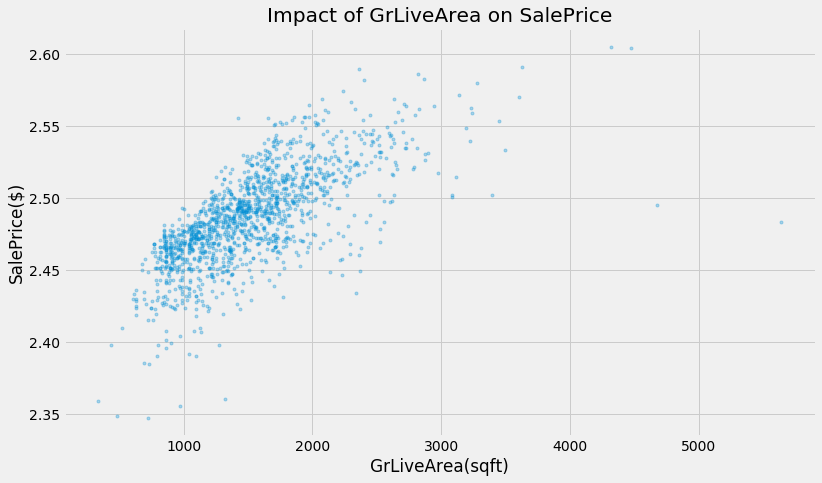

In [37]:
#GrLivArea vs SalePrice

#One can observe there is a strong positive relationship between GrLiveArea and the SalePrice.
#As the living area increases more expensive does the house becomes. 
plt.figure(figsize=(12,7))
plt.xlabel('GrLiveArea(sqft)')
plt.ylabel('SalePrice($)')
plt.title('Impact of GrLiveArea on SalePrice')
plt.plot(train.GrLivArea, np.log(train.SalePrice),'.', alpha = 0.3)

In [38]:
#we have some outliers. If we take a closer look, there are houses with huge areas but with reasonable prices. 
#If we leave this points untreated, they can have a huge impact on the accuracy of a mode.

In [39]:
#YearBuilt and GarageYrBlt
'''
It might be interesting to know if all houses were already built with a garage or if this construction was later added.
As expected, most of the houses were built with already having a garage, 
this is shown by the diagnonal positive line which runs across the plot. 
From this we might want to create a new categorical feature that tells us
if the garage was originally built with the house or added later.
'''

'\nIt might be interesting to know if all houses were already built with a garage or if this construction was later added.\nAs expected, most of the houses were built with already having a garage, \nthis is shown by the diagnonal positive line which runs across the plot. \nFrom this we might want to create a new categorical feature that tells us\nif the garage was originally built with the house or added later.\n'

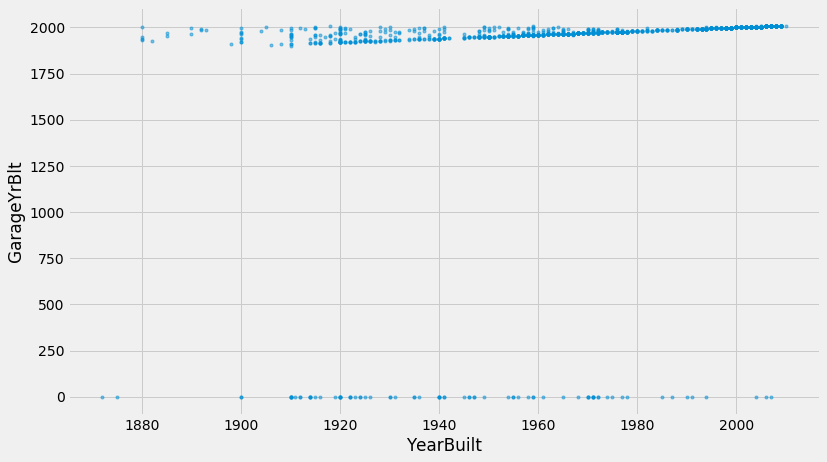

In [40]:
plt.figure(figsize=(12,7))
plt.xlabel("YearBuilt")
plt.ylabel("GarageYrBlt")
plt.plot(train.YearBuilt, train.GarageYrBlt,'.', alpha=0.5, label = 'training set')



In [41]:
'''
In addition, there seems to be some outliers.
The most outrageous is the garage built later then 2200.
there are also some houses which have garages that were built 20 or 30 years earlier (points below the diagonal).
We can either treat these values if we have the correct information or treat them as missing values.
'''

'\nIn addition, there seems to be some outliers.\nThe most outrageous is the garage built later then 2200.\nthere are also some houses which have garages that were built 20 or 30 years earlier (points below the diagonal).\nWe can either treat these values if we have the correct information or treat them as missing values.\n'

In [42]:
#YearBuilt and SalePrice time series
'''Most of the houses in the dataset were built in the last 10 years. However, 
if you look at the chart that plots the year when the house was built versus the median sale price 
we see that most recent homes sale at higher values(as expected) but there are also older houses from 
the beginning of the last century who also soldat high prices. Moreover, considering this is the mean sale price, 
and the number of houses in the 1900s is much lower the ratio of sale price is much higher.'''

'Most of the houses in the dataset were built in the last 10 years. However, \nif you look at the chart that plots the year when the house was built versus the median sale price \nwe see that most recent homes sale at higher values(as expected) but there are also older houses from \nthe beginning of the last century who also soldat high prices. Moreover, considering this is the mean sale price, \nand the number of houses in the 1900s is much lower the ratio of sale price is much higher.'

Year of Built and Total Number of Homes
   index  YearBuilt
0   2006         67
1   2005         64
2   2004         54
3   2007         49
4   2003         45
------------------------------------
   YearBuilt  Count
0       2006     67
1       2005     64
2       2004     54
3       2007     49
4       2003     45
--------------------------------


<BarContainer object of 112 artists>

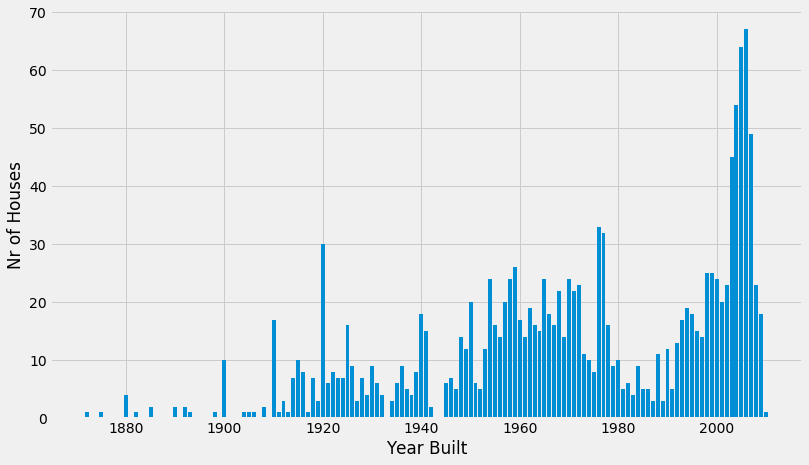

In [43]:
#check the distribution of year built
temp = train['YearBuilt'].value_counts().reset_index(name='YearBuilt') #selecting year and totl number of home build in it
print("Year of Built and Total Number of Homes")
print(temp.head())
print("------------------------------------")
temp.columns = ['YearBuilt', 'Count'] #Setting Column name to temp dataframe
print(temp.head())
print("--------------------------------")
plt.figure(figsize=(12,7))
plt.xlabel("Year Built")
plt.ylabel("Nr of Houses")
plt.bar(temp["YearBuilt"], temp["Count"])

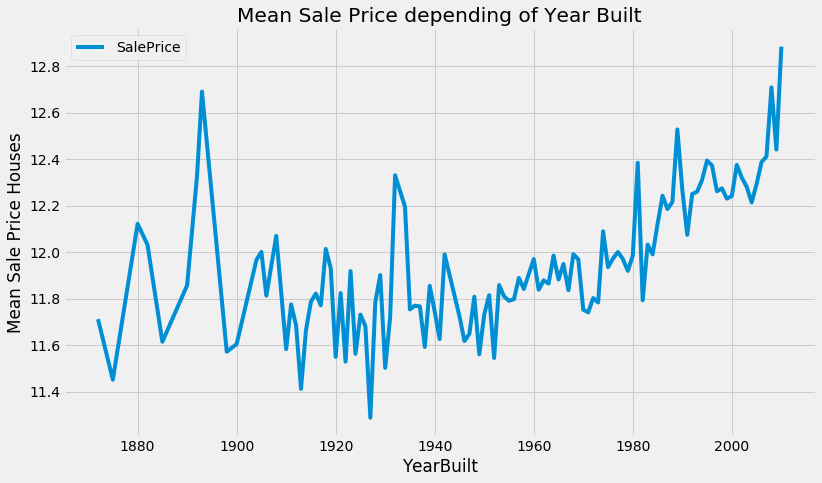

In [44]:
train[['YearBuilt','SalePrice']].groupby(['YearBuilt'], as_index=True).mean().plot(figsize=(12,7))
plt.title('Mean Sale Price depending of Year Built');
plt.ylabel('Mean Sale Price Houses');

In [45]:
#Another interesting observation is that probably due to the 2008 housing crisis we see a decrease in the sale price since 2007.

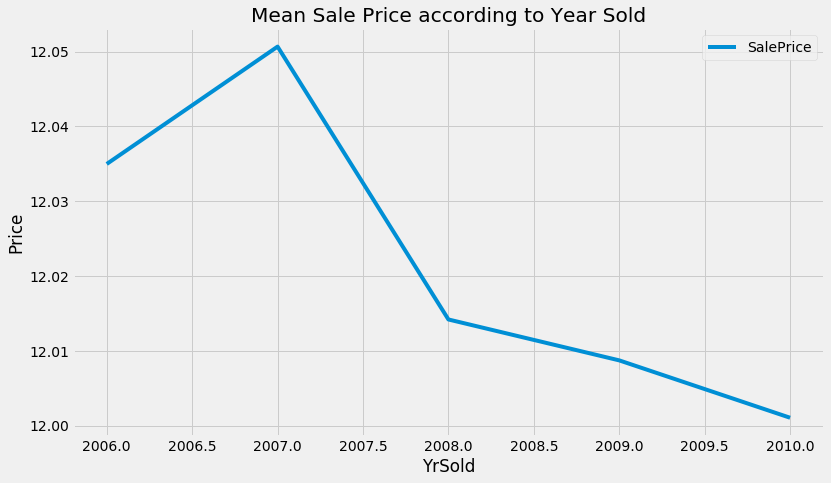

In [46]:
train[['YrSold','SalePrice']].groupby(['YrSold'], as_index=True).mean().plot(figsize=(12,7))
plt.title('Mean Sale Price according to Year Sold');
plt.ylabel('Price');

Categorical Variables

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

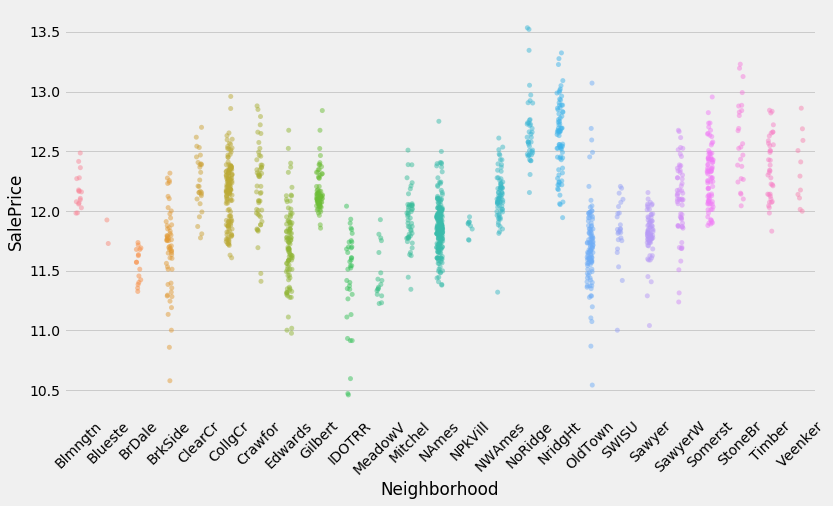

In [47]:
#Impact of Neighorhood on SalePrice
plt.figure(figsize=(12,7))
sns.stripplot(x = train.Neighborhood, y = train.SalePrice,
              order = np.sort(train.Neighborhood.unique()), #order is a keyword of stripplot which arrange x axis in order
              jitter=0.1, alpha=0.5)
 
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

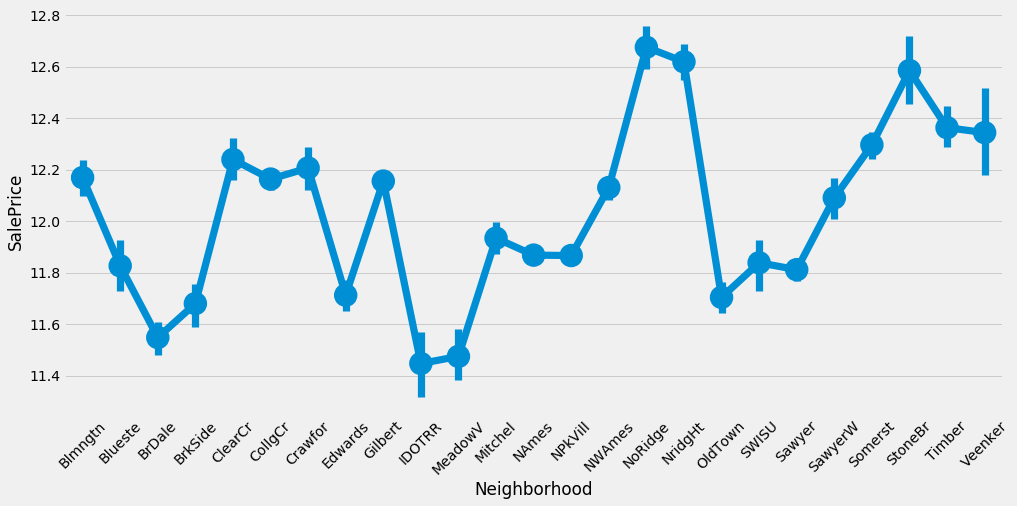

In [48]:
Neighborhood_meanSP = np.sort(train.Neighborhood.unique())
plt.figure(figsize=(15,7))
sns.pointplot(x = train.Neighborhood, y = train.SalePrice,order = Neighborhood_meanSP)
plt.xticks(rotation=45)

In [49]:
#Here, the points represent the average sale price for each neighbourhood, 
#while the vertical bars indicate the variation in this value.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

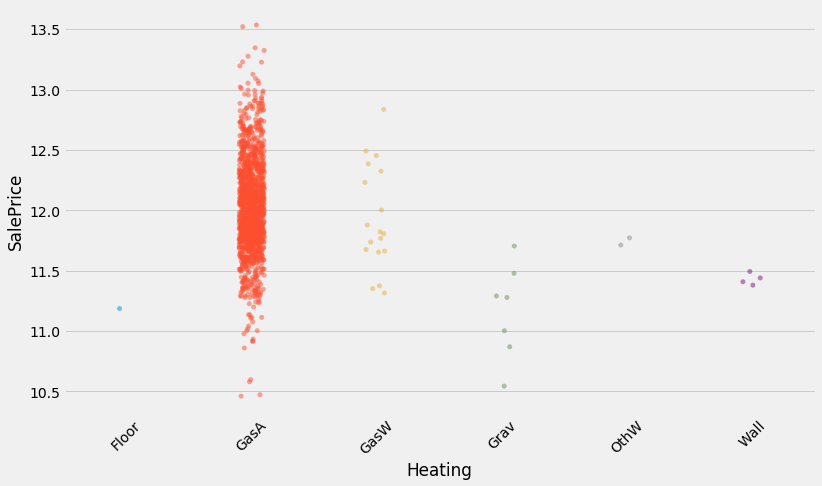

In [50]:
#Impact of Heating on SalePrice
'''As we saw before, most houses have GasA for heating system. 
This system is present from the cheapest to the most expensive houses.
It does not seem to have a great impact on the sale value.'''
plt.figure(figsize=(12,7))
sns.stripplot(x = train.Heating, y = train.SalePrice,
              order = np.sort(train.Heating.unique()),
              jitter=0.1, alpha=0.5)
 
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

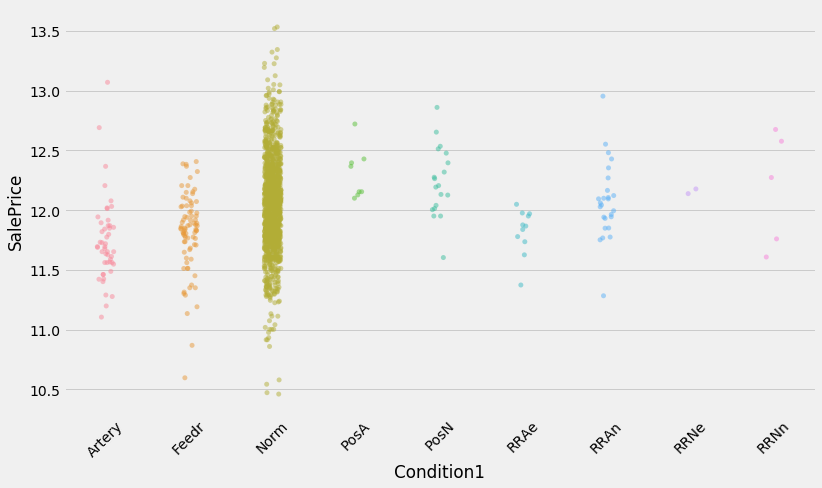

In [51]:
#Impact of Condition1 on SalePrice
plt.figure(figsize=(12,7))
sns.stripplot(x = train.Condition1, y = train.SalePrice,
              order = np.sort(train.Condition1.unique()),
              jitter=0.1, alpha=0.5)
 
plt.xticks(rotation=45)

# Data Pre-processing


In [53]:
# Outlier values
'''
If you remember, we discovered that the variable GrLivArea has outlier values.
Precisely, four points crossed the 4,000 mark.
Let’s give them the mean value since Kaggle demans all houses and we cannot delete.
'''
#dealing with outliers. Kaggle demands that the final submission has all the houses
GrLivArea_mean = train['GrLivArea'].mean()
func = lambda x: x['GrLivArea'] > 4000 and GrLivArea_mean or x['GrLivArea']   #check whether values are greter than 4000 or not
train['GrLivArea'] = train.apply(func,axis=1).astype(float) #we pass GrLivArea values from here

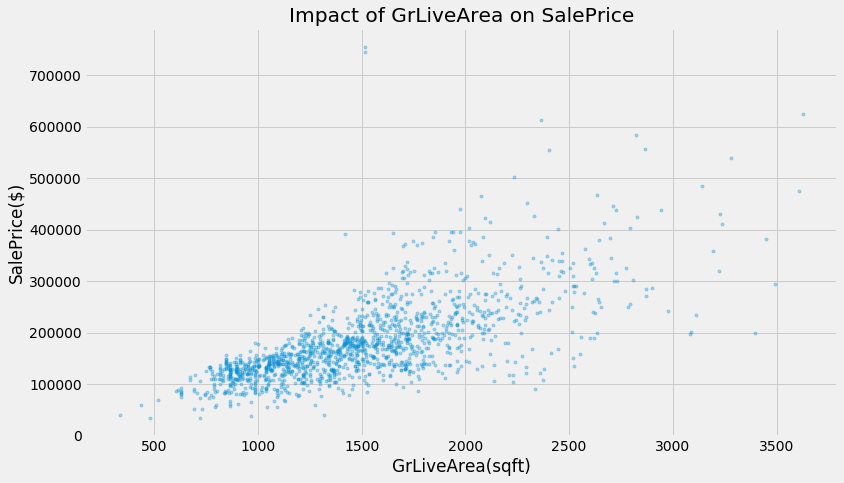

In [54]:
#after removing Ouliers GrLivArea
plt.figure(figsize=(12,7))
plt.xlabel('GrLiveArea(sqft)')
plt.ylabel('SalePrice($)')
plt.title('Impact of GrLiveArea on SalePrice')
plt.plot(train.GrLivArea, np.exp(train.SalePrice),'.', alpha = 0.3)

In [132]:
#the LotArea had outliers for values above 50,000.
GrLivArea_mean = train['LotArea'].mean()
func = lambda x: x['LotArea'] > 50000 and GrLivArea_mean or x['LotArea']   #check whether values are greter than 50000 or not
train['LotArea'] = train.apply(func,axis=1).astype(float) #we pass LotArea values from here

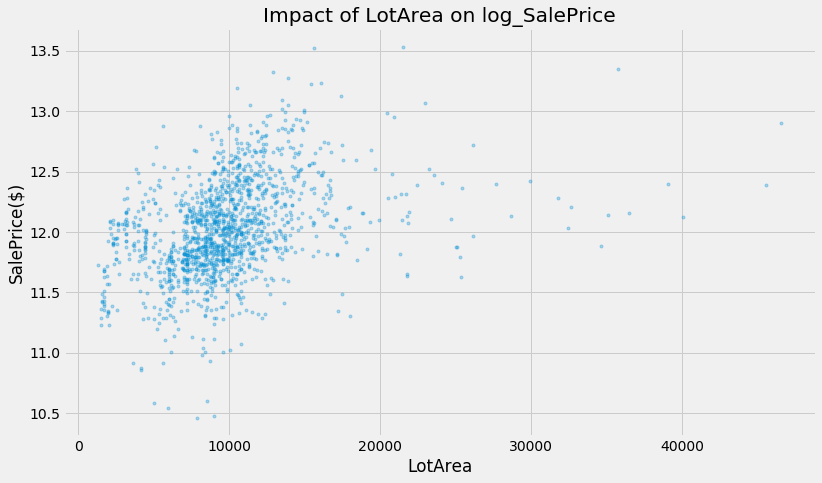

In [133]:
#after removing Ouliers LotArea
plt.figure(figsize=(12,7))
plt.xlabel("LotArea")
plt.ylabel("SalePrice($)")
plt.title("Impact of LotArea on log_SalePrice")
plt.plot(train.LotArea, train.SalePrice,'.', alpha = 0.3)

In [134]:
# Log transform skewed numeric features
#Let’s check which features also have some skewness that can affect the results and log those values.
numeric_feats = train.dtypes[train.dtypes != 'object'].index
skewed_feats = train[numeric_feats].apply(lambda x: pd.DataFrame.skew(x)) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
train[skewed_feats] = np.log1p(train[skewed_feats])
train[skewed_feats]

,MSSubClass,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtHalfBath,KitchenAbvGr,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,4.110874,9.042040,5.283204,6.561031,0.000000,5.017280,6.753438,6.751101,0.000000,7.444833,0.000000,0.693147,0.000000,4.127134,0.000000,0.000000,0.000000,0.000000,0.000000
1,3.044522,9.169623,0.000000,6.886532,0.000000,5.652489,7.141245,0.000000,0.000000,7.141245,0.693147,0.693147,5.700444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,4.110874,9.328212,5.093750,6.188264,0.000000,6.075346,6.825460,6.765039,0.000000,7.488294,0.000000,0.693147,0.000000,3.761200,0.000000,0.000000,0.000000,0.000000,0.000000
3,4.262680,9.164401,0.000000,5.379897,0.000000,6.293419,6.629363,6.629363,0.000000,7.448916,0.000000,0.693147,0.000000,3.583519,5.609472,0.000000,0.000000,0.000000,0.000000
4,4.110874,9.565284,5.860786,6.486161,0.000000,6.196444,7.044033,6.960348,0.000000,7.695758,0.000000,0.693147,5.262690,4.442651,0.000000,0.000000,0.000000,0.000000,0.000000
5,3.931826,9.555064,0.000000,6.597146,0.000000,4.174387,6.680855,6.340359,0.000000,7.217443,0.000000,0.693147,3.713572,3.433987,0.000000,5.771441,0.000000,0.000000,6.552508
6,3.044522,9.218804,5.231109,7.222566,0.000000,5.762051,7.430707,0.000000,0.000000,7.435438,0.000000,0.693147,5.545177,4.060443,0.000000,0.000000,0.000000,0.000000,0.000000
7,4.110874,9.247925,5.484797,6.756932,3.496508,5.379897,7.010312,6.891626,0.000000,7.645398,0.000000,0.693147,5.463832,5.323010,5.433722,0.000000,0.000000,0.000000,5.860786
8,3.931826,8.719481,0.000000,0.000000,0.000000,6.859615,6.859615,6.624065,0.000000,7.481556,0.000000,1.098612,4.510860,0.000000,5.327876,0.000000,0.000000,0.000000,0.000000
9,5.252273,8.912069,0.000000,6.747587,0.000000,4.948760,6.899723,0.000000,0.000000,6.982863,0.000000,1.098612,0.000000,1.609438,0.000000,0.000000,0.000000,0.000000,0.000000


In [135]:
#Dropping features that showed high correlation
train.drop(['GarageArea','X1stFlrSF','TotRmsAbvGrd'],axis =1, inplace = True)

KeyError: "['GarageArea' 'X1stFlrSF' 'TotRmsAbvGrd'] not found in axis"

In [136]:
train.shape

(1460, 72)

In [60]:
#Non-numerical Features
#Counting Non number variables
train.dtypes.value_counts()

object     38
float64    21
int64      16
dtype: int64

In [ ]:
'''
Input we must encode these non-numerical features.
This transformation varies depending on the nature of the feature and the model we opt to go with.
Usually, non-numerical variables tend to come in two flavours: ordinal and categorical.
Ordinal variables — such as OverallQual or LotShape — have an intrinsic order to them, while purely Categorical variables —
such as Neighbourhood or Foundation — do not. Let’s have a look at how to treat each of these in turn.
'''

In [61]:
d = train.select_dtypes(include = [object]).columns
d

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [137]:
#For preprocessing the data
#Lable Encoding

from sklearn import preprocessing
le = {}

for x in d:
    le[x]= preprocessing.LabelEncoder()    
print("le ", le)
    
for x in d:
    train[x]=le[x].fit_transform(train.__getattr__(x))

le  {'MSZoning': LabelEncoder(), 'Street': LabelEncoder(), 'LotShape': LabelEncoder(), 'LandContour': LabelEncoder(), 'Utilities': LabelEncoder(), 'LotConfig': LabelEncoder(), 'LandSlope': LabelEncoder(), 'Neighborhood': LabelEncoder(), 'Condition1': LabelEncoder(), 'Condition2': LabelEncoder(), 'BldgType': LabelEncoder(), 'HouseStyle': LabelEncoder(), 'RoofStyle': LabelEncoder(), 'RoofMatl': LabelEncoder(), 'Exterior1st': LabelEncoder(), 'Exterior2nd': LabelEncoder(), 'MasVnrType': LabelEncoder(), 'ExterQual': LabelEncoder(), 'ExterCond': LabelEncoder(), 'Foundation': LabelEncoder(), 'BsmtQual': LabelEncoder(), 'BsmtCond': LabelEncoder(), 'BsmtExposure': LabelEncoder(), 'BsmtFinType1': LabelEncoder(), 'BsmtFinType2': LabelEncoder(), 'Heating': LabelEncoder(), 'HeatingQC': LabelEncoder(), 'CentralAir': LabelEncoder(), 'Electrical': LabelEncoder(), 'KitchenQual': LabelEncoder(), 'Functional': LabelEncoder(), 'GarageType': LabelEncoder(), 'GarageFinish': LabelEncoder(), 'GarageQual': Lab

In [138]:
train

(1460, 72)

# Feature Engineering

In This section we are going to add new features by combining existing features

In [139]:
# Remodeled (categorical)
'''Yes or No if Year Built is different from Year Remodeled; 
If the year the house was remodeled is different from the year it was built, 
the remodeling likely increases property value.'''
train['Remodeled'] = train['YearRemodAdd'] - train['YearBuilt']
func = lambda x: x['Remodeled'] > 0 and 1.0 or 0.0
train['Remodeled'] = train.apply(func,axis=1).astype(float)
train['Remodeled'].head()

0    0.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: Remodeled, dtype: float64

In [140]:
#Total Area (continuous)
'''
There are some variables which describe area of different parts of House
we might expect that the total square footage has a strong influence on Sale Price
'''
train['OverallSF'] = train['X2ndFlrSF'] + train['TotalBsmtSF']

In [141]:
train.head()
train.shape

(1460, 74)

In [142]:
y = train.SalePrice
train.drop(['SalePrice'],inplace=True , axis=1)
y


0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
30      10.596635
31      11.914048
32      12.100156
33      12.016726
34      12.533576
35      12.641097
36      11.884489
37      11.938193
38      11.599103
39      11.314475
40      11.982929
41      12.043554
42      11.877569
43      11.777211
44      11.856515
45      12.675764
46      12.387085
47      12.428015
48      11.635143
49      11.751942
50      12.083905
51      11.648330
52      11.608236
53      12.860999
54      11.775290
55      12

In [143]:
#After removing SalePrice
train.shape


(1460, 73)

In [144]:
y = y.astype(int)

#y = y.values.ravel()

y = y.values.reshape(-1 )
y

array([12, 12, 12, ..., 12, 11, 11])

In [145]:
from sklearn.model_selection import train_test_split


#Split the data into test an dtrain
X_train, X_test, Y_train, Y_test = train_test_split(train, y, test_size=0.3 , random_state= 10)

# Decision Tree

In [72]:
# Predicting using the Decision_Tree_Classifier
# Fit function to train the model
# Predict the values with the Y_test, to compare with the predict values

from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier()

#fit the model on the data and predict the values

model_DecisionTree.fit(X_train, Y_train)
Y_pred = model_DecisionTree.predict(X_test)

#print(Y_pred) 
print("-------------------------------------------------------------------------------------")
print(list(zip(Y_test, Y_pred)))

-------------------------------------------------------------------------------------
[(12, 12), (12, 12), (11, 11), (12, 11), (12, 12), (12, 12), (12, 12), (11, 11), (12, 12), (12, 12), (11, 12), (12, 12), (12, 12), (11, 11), (12, 11), (12, 12), (12, 11), (11, 11), (12, 12), (12, 12), (13, 12), (11, 11), (11, 11), (11, 11), (12, 12), (11, 12), (12, 11), (11, 11), (11, 11), (12, 12), (11, 11), (11, 11), (11, 11), (11, 11), (11, 12), (10, 11), (12, 11), (12, 12), (12, 12), (11, 11), (12, 12), (11, 11), (11, 11), (11, 11), (12, 12), (12, 12), (12, 12), (11, 11), (11, 11), (12, 12), (12, 12), (11, 10), (12, 12), (11, 11), (12, 12), (12, 11), (12, 12), (12, 12), (11, 11), (11, 11), (11, 11), (12, 12), (11, 11), (12, 12), (12, 12), (12, 12), (12, 12), (12, 12), (11, 11), (12, 12), (11, 11), (11, 11), (11, 11), (11, 11), (12, 12), (12, 12), (12, 12), (11, 11), (12, 11), (12, 12), (12, 12), (12, 12), (12, 11), (12, 12), (11, 12), (11, 11), (11, 12), (12, 11), (12, 12), (11, 11), (11, 11), (11

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#confusion matrix
print("Confustion Matrix -----------------------------------------")
print(confusion_matrix(Y_test, Y_pred))
print("Accuracy  -----------------------------------------")
print(accuracy_score(Y_test, Y_pred))
print("Classification  -----------------------------------------")
print(classification_report(Y_test, Y_pred))

Confustion Matrix -----------------------------------------
[[  3   2   0   0]
 [  5 186  27   0]
 [  0  27 178   6]
 [  0   0   3   1]]
Accuracy  -----------------------------------------
0.8401826484018264
Classification  -----------------------------------------
              precision    recall  f1-score   support

          10       0.38      0.60      0.46         5
          11       0.87      0.85      0.86       218
          12       0.86      0.84      0.85       211
          13       0.14      0.25      0.18         4

   micro avg       0.84      0.84      0.84       438
   macro avg       0.56      0.64      0.59       438
weighted avg       0.85      0.84      0.84       438



# Linear Regression

In [74]:
#Linear Regression
from sklearn import linear_model
modelLinearReg = linear_model.LogisticRegression()
modelLinearReg.fit(X_train,Y_train)
Y_pred_Liner = modelLinearReg.predict(X_test)
print(list(zip(Y_test,Y_pred_Liner)))

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[(12, 11), (12, 12), (11, 11), (12, 12), (12, 12), (12, 12), (12, 12), (11, 11), (12, 12), (12, 11), (11, 11), (12, 12), (12, 12), (11, 11), (12, 12), (12, 12), (12, 12), (11, 11), (12, 12), (12, 12), (13, 12), (11, 11), (11, 11), (11, 11), (12, 12), (11, 11), (12, 11), (11, 11), (11, 11), (12, 12), (11, 11), (11, 12), (11, 11), (11, 11), (11, 11), (10, 11), (12, 11), (12, 12), (12, 12), (11, 11), (12, 12), (11, 11), (11, 11), (11, 11), (12, 12), (12, 12), (12, 12), (11, 11), (11, 11), (12, 12), (12, 12), (11, 11), (12, 12), (11, 11), (12, 12), (12, 11), (12, 12), (12, 12), (11, 11), (11, 11), (11, 11), (12, 12), (11, 11), (12, 12), (12, 12), (12, 11), (12, 12), (12, 12), (11, 11), (12, 12), (11, 11), (11, 11), (11, 11), (11, 11), (12, 12), (12, 12), (12, 12), (11, 11), (12, 12), (12, 12), (12, 12), (12, 12), (12, 12), (12, 12), (11, 11), (11, 11), (11, 11), (12, 12), (12, 12), (11, 11), (11, 11), (11, 11), (11, 11), (11, 11), (12, 12), (11, 11), (12, 12), (12, 12), (12, 11), (12, 12),

In [75]:
#Cross check the predictions values

from sklearn.metrics import r2_score, mean_squared_error

score = r2_score(Y_test, Y_pred_Liner)
print(score)  

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(rmse)   #Note: Rmse should be always near to the lower value of the Dependent variable range.

0.6704407022572554
0.39977162430339336


In [76]:
#--------------------------
#To get the Summary of Model
#We are  using OLS(Ordinarily least Square) Method  OLS means linear Regression
#------------------

import statsmodels.api as sm
from scipy import stats

x = sm.add_constant(train)

#creating an OLS model
est = sm.OLS(y,x)

#Fitting the data
est2 = est.fit()


# Summary of the model
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     50.60
Date:                Tue, 09 Apr 2019   Prob (F-statistic):               0.00
Time:                        04:11:52   Log-Likelihood:                -193.46
No. Observations:                1460   AIC:                             538.9
Df Residuals:                    1384   BIC:                             940.7
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.0494     11.867      0.763

# Ensable Modelling
#Bagging Tree( Extra Trees Clasifier )

In [77]:
#predictng using the Bagging Classifier

from sklearn.ensemble import ExtraTreesClassifier

model = (ExtraTreesClassifier())
#fit the model on the data and predict the values
model = model.fit(X_train, Y_train)

Y_predBagging = model.predict(X_test)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [75]:
print(list(zip(Y_test,Y_predBagging)))

[(12, 11), (12, 12), (11, 11), (12, 12), (12, 12), (12, 12), (12, 12), (11, 11), (12, 12), (12, 11), (11, 11), (12, 12), (12, 12), (11, 11), (12, 12), (12, 12), (12, 12), (11, 11), (12, 12), (12, 12), (13, 12), (11, 11), (11, 11), (11, 11), (12, 12), (11, 12), (12, 11), (11, 11), (11, 11), (12, 12), (11, 11), (11, 12), (11, 11), (11, 11), (11, 11), (10, 11), (12, 11), (12, 12), (12, 12), (11, 11), (12, 12), (11, 11), (11, 11), (11, 11), (12, 12), (12, 12), (12, 12), (11, 11), (11, 11), (12, 12), (12, 12), (11, 11), (12, 12), (11, 11), (12, 12), (12, 11), (12, 12), (12, 12), (11, 11), (11, 11), (11, 11), (12, 12), (11, 11), (12, 12), (12, 12), (12, 12), (12, 12), (12, 12), (11, 11), (12, 12), (11, 11), (11, 11), (11, 11), (11, 11), (12, 12), (12, 12), (12, 12), (11, 11), (12, 11), (12, 12), (12, 12), (12, 12), (12, 12), (12, 12), (11, 11), (11, 11), (11, 12), (12, 12), (12, 12), (11, 11), (11, 11), (11, 11), (11, 11), (11, 11), (12, 12), (11, 11), (12, 11), (12, 12), (12, 11), (12, 12),

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#confusion matrix
print("Confustion Matrix -----------------------------------------")
print(confusion_matrix(Y_test, Y_predBagging))
print("Accuracy  -----------------------------------------")
print(accuracy_score(Y_test, Y_predBagging))
print("Classification  -----------------------------------------")
print(classification_report(Y_test, Y_predBagging))

Confustion Matrix -----------------------------------------
[[  0   5   0   0]
 [  1 203  14   0]
 [  0  29 181   1]
 [  0   0   4   0]]
Accuracy  -----------------------------------------
0.8767123287671232
Classification  -----------------------------------------
              precision    recall  f1-score   support

          10       0.00      0.00      0.00         5
          11       0.86      0.93      0.89       218
          12       0.91      0.86      0.88       211
          13       0.00      0.00      0.00         4

   micro avg       0.88      0.88      0.88       438
   macro avg       0.44      0.45      0.44       438
weighted avg       0.86      0.88      0.87       438



# Random Forest Model

In [79]:
#predicting using the random_Forest_Classifier


from sklearn.ensemble import RandomForestClassifier

model_RandomForest = (ExtraTreesClassifier(500))
#fit the model on the data and predict the values
model_RandomForest.fit(X_train, Y_train)

Y_predRandomForest = model_RandomForest.predict(X_test)
print(list(zip(Y_test,Y_predRandomForest)))

[(12, 11), (12, 12), (11, 11), (12, 11), (12, 12), (12, 12), (12, 12), (11, 11), (12, 12), (12, 11), (11, 11), (12, 12), (12, 12), (11, 11), (12, 12), (12, 12), (12, 12), (11, 11), (12, 12), (12, 12), (13, 12), (11, 11), (11, 11), (11, 11), (12, 12), (11, 12), (12, 12), (11, 11), (11, 11), (12, 12), (11, 11), (11, 11), (11, 11), (11, 11), (11, 11), (10, 11), (12, 11), (12, 12), (12, 12), (11, 11), (12, 12), (11, 11), (11, 11), (11, 11), (12, 12), (12, 12), (12, 12), (11, 11), (11, 11), (12, 12), (12, 12), (11, 11), (12, 12), (11, 11), (12, 12), (12, 11), (12, 12), (12, 12), (11, 11), (11, 11), (11, 11), (12, 12), (11, 11), (12, 12), (12, 12), (12, 12), (12, 12), (12, 12), (11, 11), (12, 12), (11, 11), (11, 11), (11, 11), (11, 11), (12, 12), (12, 12), (12, 12), (11, 11), (12, 11), (12, 12), (12, 12), (12, 12), (12, 12), (12, 12), (11, 11), (11, 11), (11, 12), (12, 11), (12, 12), (11, 11), (11, 11), (11, 11), (11, 11), (11, 11), (12, 12), (11, 11), (12, 12), (12, 12), (12, 11), (12, 12),

In [80]:
from sklearn.metrics import confusion_matrix ,accuracy_score, classification_report
print("Confusion Matrix_____________________")
print(confusion_matrix(Y_test,Y_predRandomForest))
print("Accuracy --------------------")
print(accuracy_score(Y_test,Y_predRandomForest))
print("Classification------------------------------")
print(classification_report(Y_test,Y_predRandomForest))

Confusion Matrix_____________________
[[  0   5   0   0]
 [  0 206  12   0]
 [  0  17 194   0]
 [  0   0   4   0]]
Accuracy --------------------
0.91324200913242
Classification------------------------------
              precision    recall  f1-score   support

          10       0.00      0.00      0.00         5
          11       0.90      0.94      0.92       218
          12       0.92      0.92      0.92       211
          13       0.00      0.00      0.00         4

   micro avg       0.91      0.91      0.91       438
   macro avg       0.46      0.47      0.46       438
weighted avg       0.89      0.91      0.90       438



C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(1460, 76)

# Testing Data

In [ ]:
#i'm going to use Random Forest Algorithm for Predicting SalePrice Values of Test data set as
#it give accuracy over 90 percent

In [157]:
test = pd.read_csv('Model_Test_Data.csv' , delimiter=" *, *" ,engine='python')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,CBlock,TA,TA,No,Rec,468,LwQ,144,270,882,GasA,TA,Y,SBrkr,896,0,0,896,0,0,1,0,2,1,TA,5,Typ,0,Attchd,1961,Unf,1,730,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108,TA,TA,CBlock,TA,TA,No,ALQ,923,Unf,0,406,1329,GasA,TA,Y,SBrkr,1329,0,0,1329,0,0,1,1,3,1,Gd,6,Typ,0,Attchd,1958,Unf,1,312,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,GLQ,791,Unf,0,137,928,GasA,Gd,Y,SBrkr,928,701,0,1629,0,0,2,1,3,1,TA,6,Typ,1,Attchd,1997,Fin,2,482,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20,TA,TA,PConc,TA,TA,No,GLQ,602,Unf,0,324,926,GasA,Ex,Y,SBrkr,926,678,0,1604,0,0,2,1,3,1,Gd,7,Typ,1,Attchd,1998,Fin,2,470,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0,Gd,TA,PConc,Gd,TA,No,ALQ,263,Unf,0,1017,1280,GasA,Ex,Y,SBrkr,1280,0,0,1280,0,0,2,0,2,1,Gd,5,Typ,0,Attchd,1992,RFn,2,506,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal


In [158]:
test.drop(['Id','GarageArea','X1stFlrSF','TotRmsAbvGrd'],axis = 1 ,inplace=True)

In [159]:
#For preprocessing the data
#Lable Encoding

from sklearn import preprocessing
le = {}

for x in d:
    le[x]= preprocessing.LabelEncoder()    
print("le ", le)
    
for x in d:
    test[x]=le[x].fit_transform(test.__getattr__(x))

le  {'MSZoning': LabelEncoder(), 'Street': LabelEncoder(), 'LotShape': LabelEncoder(), 'LandContour': LabelEncoder(), 'Utilities': LabelEncoder(), 'LotConfig': LabelEncoder(), 'LandSlope': LabelEncoder(), 'Neighborhood': LabelEncoder(), 'Condition1': LabelEncoder(), 'Condition2': LabelEncoder(), 'BldgType': LabelEncoder(), 'HouseStyle': LabelEncoder(), 'RoofStyle': LabelEncoder(), 'RoofMatl': LabelEncoder(), 'Exterior1st': LabelEncoder(), 'Exterior2nd': LabelEncoder(), 'MasVnrType': LabelEncoder(), 'ExterQual': LabelEncoder(), 'ExterCond': LabelEncoder(), 'Foundation': LabelEncoder(), 'BsmtQual': LabelEncoder(), 'BsmtCond': LabelEncoder(), 'BsmtExposure': LabelEncoder(), 'BsmtFinType1': LabelEncoder(), 'BsmtFinType2': LabelEncoder(), 'Heating': LabelEncoder(), 'HeatingQC': LabelEncoder(), 'CentralAir': LabelEncoder(), 'Electrical': LabelEncoder(), 'KitchenQual': LabelEncoder(), 'Functional': LabelEncoder(), 'GarageType': LabelEncoder(), 'GarageFinish': LabelEncoder(), 'GarageQual': Lab

In [160]:
#After dropping unnecessary columns
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80,11622,1,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,0,10,12,2,0,3,4,1,3,3,3,4,468,3,144,270,882,0,4,1,3,0,0,896,0,0,1,0,2,1,3,6,0,1,1961,2,1,3,4,2,140,0,0,0,120,0,0,6,2010,8,4
1,20,3,81,14267,1,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,0,11,13,1,108,3,4,1,3,3,3,0,923,5,0,406,1329,0,4,1,3,0,0,1329,0,0,1,1,3,1,2,6,0,1,1958,2,1,3,4,2,393,36,0,0,0,0,12500,6,2010,8,4
2,60,3,74,13830,1,0,3,0,4,0,8,2,2,0,4,5,5,1997,1998,1,0,10,12,2,0,3,4,2,2,3,3,2,791,5,0,137,928,0,2,1,3,701,0,1629,0,0,2,1,3,1,3,6,1,1,1997,0,2,3,4,2,212,34,0,0,0,0,0,3,2010,8,4
3,60,3,78,9978,1,0,3,0,4,0,8,2,2,0,4,6,6,1998,1998,1,0,10,12,1,20,3,4,2,3,3,3,2,602,5,0,324,926,0,0,1,3,678,0,1604,0,0,2,1,3,1,2,6,1,1,1998,0,2,3,4,2,360,36,0,0,0,0,0,6,2010,8,4
4,120,3,43,5005,1,0,1,0,4,0,22,2,2,4,2,8,5,1992,1992,1,0,6,6,2,0,2,4,2,2,3,3,0,263,5,0,1017,1280,0,0,1,3,0,0,1280,0,0,2,0,2,1,2,6,0,1,1992,1,2,3,4,2,0,82,0,0,144,0,0,1,2010,8,4


Feature engineering for Test Data, 

we do same Feature Engineering which we do earlier for Train data

In [161]:
# Remodeled (categorical)
test['Remodeled'] = test['YearRemodAdd'] - test['YearBuilt']
func = lambda x: x['Remodeled'] > 0 and 1.0 or 0.0
test['Remodeled'] = test.apply(func,axis=1).astype(float)

In [162]:
#New House (categorical)
test['NewHouse'] = test['YrSold'] - test['YearBuilt']
func = lambda x: x['NewHouse'] == 0 and 1.0 or 0.0
test['NewHouse'] = test.apply(func,axis=1).astype(float)

In [163]:
test.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Remodeled,NewHouse
0,20,2,80,11622,1,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,0,10,12,2,0,3,4,1,3,3,3,4,468,3,144,270,882,0,4,1,3,0,0,896,0,0,1,0,2,1,3,6,0,1,1961,2,1,3,4,2,140,0,0,0,120,0,0,6,2010,8,4,0.0,0.0
1,20,3,81,14267,1,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,0,11,13,1,108,3,4,1,3,3,3,0,923,5,0,406,1329,0,4,1,3,0,0,1329,0,0,1,1,3,1,2,6,0,1,1958,2,1,3,4,2,393,36,0,0,0,0,12500,6,2010,8,4,0.0,0.0
2,60,3,74,13830,1,0,3,0,4,0,8,2,2,0,4,5,5,1997,1998,1,0,10,12,2,0,3,4,2,2,3,3,2,791,5,0,137,928,0,2,1,3,701,0,1629,0,0,2,1,3,1,3,6,1,1,1997,0,2,3,4,2,212,34,0,0,0,0,0,3,2010,8,4,1.0,0.0
3,60,3,78,9978,1,0,3,0,4,0,8,2,2,0,4,6,6,1998,1998,1,0,10,12,1,20,3,4,2,3,3,3,2,602,5,0,324,926,0,0,1,3,678,0,1604,0,0,2,1,3,1,2,6,1,1,1998,0,2,3,4,2,360,36,0,0,0,0,0,6,2010,8,4,0.0,0.0
4,120,3,43,5005,1,0,1,0,4,0,22,2,2,4,2,8,5,1992,1992,1,0,6,6,2,0,2,4,2,2,3,3,0,263,5,0,1017,1280,0,0,1,3,0,0,1280,0,0,2,0,2,1,2,6,0,1,1992,1,2,3,4,2,0,82,0,0,144,0,0,1,2010,8,4,0.0,0.0


In [164]:
test.shape

(1459, 73)

In [165]:
#predicting using the random_Forest_Classifier


from sklearn.ensemble import RandomForestClassifier

model_RandomForest = (ExtraTreesClassifier(500))
#fit the model on the data and predict the values
model_RandomForest.fit(X_train, Y_train)

Y_predRandomForest = model_RandomForest.predict(test)


In [166]:
Y_predRandomForest

array([11, 11, 12, ..., 11, 11, 12])

In [175]:
op = np.exp(Y_predRandomForest)

In [176]:
op = op.astype(int)

#y = y.values.ravel()



In [177]:
df = pd.DataFrame(op)

In [179]:
df.to_csv("Test_Output_Data_RandomFores.csv" , header= False , index= False)

In [180]:
#Decision Tree
# Predicting using the Decision_Tree_Classifier


from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier()

#fit the model on the data and predict the values

model_DecisionTree.fit(X_train, Y_train)
Y_pred_Decision = model_DecisionTree.predict(test)



In [181]:
Y_pred_Decision

array([11, 12, 11, ..., 11, 12, 13])

In [183]:
dis = np.exp(Y_predRandomForest)

In [184]:
dis = dis.astype(int)

In [186]:
df1 = pd.DataFrame(dis)

In [187]:
df1.to_csv("Test_Output_Data_Decision.csv" , header= False , index= False)